<a href="https://colab.research.google.com/github/Migrice/Master2-Projects/blob/main/SA_on_playstore_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install transformers==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 563 kB 33.4 MB/s 
     |████████████████████████████████| 132 kB 61.4 MB/s 
     |████████████████████████████████| 880 kB 53.2 MB/s 
     |████████████████████████████████| 5.6 MB 16.2 MB/s 
     |████████████████████████████████| 1.3 MB 53.2 MB/s 
     |████████████████████████████████| 9.9 MB 40.5 MB/s 
     |████████████████████████████████| 79 kB 9.0 MB/s 
     |████████████████████████████████| 140 kB 59.0 MB/s 
     |████████████████████████████████| 127 kB 65.4 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=c9b8362992ac369d9877e5248674a413aa8886af04453e855eb76ba7ebb7169c
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    

In [ ]:
import torch
print(torch.cuda.is_available())

True


In [ ]:
from zipfile import ZipFile 
  
# spécifiant le nom du fichier zip
file = "play_store_reviews.zip"
  
# ouvrir le fichier zip en mode lecture
with ZipFile(file, 'r') as zip: 
    # afficher tout le contenu du fichier zip
    zip.printdir() 
  
    # extraire tous les fichiers
    print('extraction...') 
    zip.extractall() 
    print('Terminé!')

File Name                                             Modified             Size
reviews.csv                                    2020-12-24 08:17:04      6451055
extraction...
Terminé!


In [15]:
#load librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [12]:
df = pd.read_csv("reviews.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


In [13]:
df.shape

(12495, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              12495 non-null  object
 1   userName              12495 non-null  object
 2   userImage             12495 non-null  object
 3   content               12495 non-null  object
 4   score                 12495 non-null  int64 
 5   thumbsUpCount         12495 non-null  int64 
 6   reviewCreatedVersion  10333 non-null  object
 7   at                    12495 non-null  object
 8   replyContent          5818 non-null   object
 9   repliedAt             5818 non-null   object
 10  sortOrder             12495 non-null  object
 11  appId                 12495 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'review score')

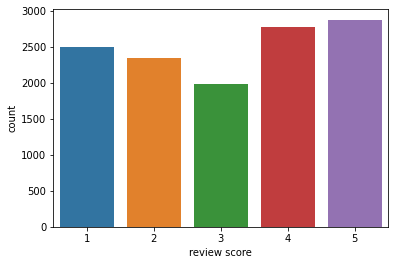

In [16]:
sns.countplot(df.score)
plt.xlabel("review score")

In [24]:
#separate scores into 3 classes
def to_sentiment(score):
  score = int(score)
  if score <=2 :
    return 0
  elif score ==3:
    return 1
  else :
    return 2

df["sentiment"] = df.score.apply(to_sentiment)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'negative'), Text(0, 0, 'neutral'), Text(0, 0, 'positive')]

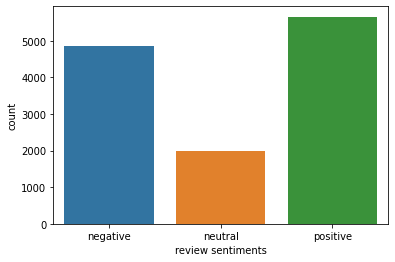

In [26]:
classnames = ["negative", "neutral", "positive"]
ax = sns.countplot(df["sentiment"])
plt.xlabel("review sentiments")

ax.set_xticklabels(classnames)

In [28]:
#Data preprocessing

from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

In [42]:
sample_txt = 'When was I last outside? I am stuck at home for 2 weeks.'
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)

encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [45]:
print(len(encoding["input_ids"][0]))
print(encoding["input_ids"]) #tokens
print(encoding["attention_mask"]) #1 represent real words and 0 represent paddings
tokenizer.convert_ids_to_tokens(encoding["input_ids"][0])

32
tensor([[ 101, 1332, 1108,  146, 1314, 1796,  136,  146, 1821, 5342, 1120, 1313,
         1111,  123, 2277,  119,  102,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])


['[CLS]',
 'When',
 'was',
 'I',
 'last',
 'outside',
 '?',
 'I',
 'am',
 'stuck',
 'at',
 'home',
 'for',
 '2',
 'weeks',
 '.',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [50]:
#check the maximum sequence length
token_lens = []
for txt in df.content:
  token = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(token))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Token count')

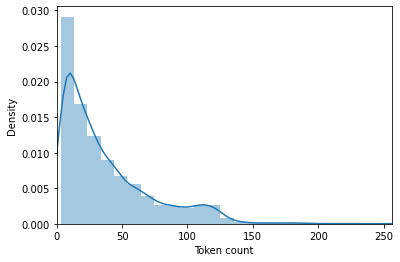

In [51]:
#plot to see the distribution
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count')

In [52]:
max_length = 160
class GPReviewDataset(torch.utils.data.Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      truncation=True,
      return_tensors='pt',
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [55]:
#separate dataset into train, test, val
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=42)

df_train.shape, df_val.shape, df_test.shape

((9996, 13), (1249, 13), (1250, 13))

In [58]:
#create data loader
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=df.content.to_numpy(),
    targets=df.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return torch.utils.data.DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [57]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, max_length, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, max_length, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, max_length, BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [59]:
#look of datas
data = next(iter(train_data_loader))
data.keys()

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [61]:
print(data['input_ids'].shape)
print(tokenizer.convert_ids_to_tokens(data["input_ids"][0]))
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 160])
['[CLS]', 'I', 'kinda', 'love', 'this', 'app', 'but', 'the', 'only', 'problem', 'that', 'I', "'", 've', 'face', 'now', 'is', 'that', 'i', 'want', 'to', 'have', 'my', 'task', 'on', 'my', 'p', '##c', 'and', 'i', 'think', 'it', 'would', 'be', 'great', 'if', 'you', 'could', 'put', 'some', 'accounts', 'so', 'that', 'we', 'can', 'easily', 'sort', 'our', 'task', 'in', 'any', 'devices', 'that', 'we', 'are', 'into', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', 

In [62]:
#load bert model
bert_model = BertModel.from_pretrained("bert-base-cased")

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [63]:
#use the bert model to encode the text

last_hidden_state, pooled_output = bert_model(
  input_ids=encoding['input_ids'], 
  attention_mask=encoding['attention_mask'],
)

In [65]:
print(last_hidden_state.shape) #sortie des autres couches cachées
print(pooled_output.shape) #sortie de la premiere couche , celle de classification

torch.Size([1, 32, 768])
torch.Size([1, 768])


In [68]:
from torch import nn
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained("bert-base-cased")
    self.dropout = nn.Dropout(p=0.3)
    self.linear = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
    output = self.dropout(pooled_output)
    return self.linear(output)

In [71]:
#create an instance of a model and move it to the GPU
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = SentimentClassifier(len(classnames))
model = model.to(device)

In [72]:
#put the input ids and attention_mask to the GPU
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([16, 160])
torch.Size([16, 160])


In [75]:
!pip install -q -U watermark

     |████████████████████████████████| 1.6 MB 35.8 MB/s 


In [78]:
#to get the predicted probabilities, we will apply the softmax function to the output
from torch.nn import functional as F
F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.6794, 0.1310, 0.1896],
        [0.5492, 0.1406, 0.3102],
        [0.4638, 0.1820, 0.3542],
        [0.5635, 0.0780, 0.3585],
        [0.4649, 0.0871, 0.4480],
        [0.4909, 0.1622, 0.3469],
        [0.3574, 0.0840, 0.5586],
        [0.6849, 0.1235, 0.1916],
        [0.5957, 0.1188, 0.2855],
        [0.4943, 0.1271, 0.3787],
        [0.5706, 0.1035, 0.3259],
        [0.5347, 0.0997, 0.3656],
        [0.5198, 0.2188, 0.2614],
        [0.4359, 0.0895, 0.4746],
        [0.7121, 0.1000, 0.1879],
        [0.6243, 0.1118, 0.2638]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [88]:
#train the model
import transformers
EPOCHS = 10


optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_data_loader) * EPOCHS

scheduler = transformers.get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [89]:
from tqdm import tqdm
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in tqdm(data_loader):
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [90]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in tqdm(data_loader):
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [91]:
%%time
  
from collections import defaultdict

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/10
----------


100%|██████████| 625/625 [04:26<00:00,  2.35it/s]


Train loss 0.5084212434768677 accuracy 0.8006202480992397


100%|██████████| 79/79 [00:11<00:00,  6.84it/s]


Val   loss 0.6312077749001829 accuracy 0.7534027221777422

Epoch 2/10
----------


100%|██████████| 625/625 [04:27<00:00,  2.34it/s]


Train loss 0.3882163167774677 accuracy 0.8582432973189277


100%|██████████| 79/79 [00:11<00:00,  6.84it/s]


Val   loss 0.7062068440114395 accuracy 0.7469975980784627

Epoch 3/10
----------


100%|██████████| 625/625 [04:27<00:00,  2.34it/s]


Train loss 0.2890338962517679 accuracy 0.9015606242497


100%|██████████| 79/79 [00:11<00:00,  6.88it/s]


Val   loss 0.8728460697810861 accuracy 0.7341873498799039

Epoch 4/10
----------


100%|██████████| 625/625 [04:27<00:00,  2.34it/s]


Train loss 0.22219764642249792 accuracy 0.933873549419768


100%|██████████| 79/79 [00:11<00:00,  6.85it/s]


Val   loss 1.1444484949630649 accuracy 0.7493995196156925

Epoch 5/10
----------


100%|██████████| 625/625 [04:27<00:00,  2.34it/s]


Train loss 0.1718783676687628 accuracy 0.9510804321728692


100%|██████████| 79/79 [00:11<00:00,  6.86it/s]


Val   loss 1.368263933854767 accuracy 0.733386709367494

Epoch 6/10
----------


100%|██████████| 625/625 [04:27<00:00,  2.34it/s]


Train loss 0.12337604128755629 accuracy 0.9673869547819128


100%|██████████| 79/79 [00:11<00:00,  6.77it/s]


Val   loss 1.4752197618348688 accuracy 0.7429943955164131

Epoch 7/10
----------


100%|██████████| 625/625 [04:29<00:00,  2.32it/s]


Train loss 0.08852970348042435 accuracy 0.975890356142457


100%|██████████| 79/79 [00:12<00:00,  6.12it/s]


Val   loss 1.6552068760877923 accuracy 0.7405924739791833

Epoch 8/10
----------


100%|██████████| 625/625 [04:27<00:00,  2.33it/s]


Train loss 0.0747128479345236 accuracy 0.9804921968787516


100%|██████████| 79/79 [00:11<00:00,  6.87it/s]


Val   loss 1.7569115695696842 accuracy 0.7357886309047237

Epoch 9/10
----------


100%|██████████| 625/625 [04:27<00:00,  2.34it/s]


Train loss 0.06333506968347356 accuracy 0.9828931572629053


100%|██████████| 79/79 [00:11<00:00,  6.82it/s]


Val   loss 1.8174322070200233 accuracy 0.7373899119295436

Epoch 10/10
----------


100%|██████████| 625/625 [04:27<00:00,  2.34it/s]


Train loss 0.056650532577512784 accuracy 0.9848939575830333


100%|██████████| 79/79 [00:11<00:00,  6.86it/s]

Val   loss 1.858646572390689 accuracy 0.7389911929543634

CPU times: user 32min 2s, sys: 13min 43s, total: 45min 45s
Wall time: 46min 34s


In [93]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

100%|██████████| 79/79 [00:10<00:00,  7.29it/s]


0.7376

In [94]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

In [97]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)
print(y_review_texts)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


['Good', 'Subscription based calendar, immediately uninstall it', 'Easy to use. No dramas. Very streamline for basic list use.', "Idk if it's my phone or this app, but I can't get it to work properly ever since I got a new phone. The allow apps feature should only allow a few apps to be used but when that's turned on I can access all apps regardless of the list making it pretty useless. I allowed everything for this app in my phone's settings but still no change. Disappointing since I used to love this app.", 'Just what I needed', 'I am currently in the free trial period. I have been in constant contact with Tech Support as my calenders wont sync. Technology support have been wonderful but too difficult for me to sort out with the time differences. The app on the mobile is slow to update changes. I love the colours and writing but functionally it is a bit sluggish for the price. I am still considering continuing once the trial is over but not sure.', 'Very helpful for visualizing your 

In [98]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred, target_names=classnames))

              precision    recall  f1-score   support

    negative       0.77      0.79      0.78       480
     neutral       0.39      0.35      0.37       216
    positive       0.83      0.84      0.84       554

    accuracy                           0.74      1250
   macro avg       0.66      0.66      0.66      1250
weighted avg       0.73      0.74      0.73      1250



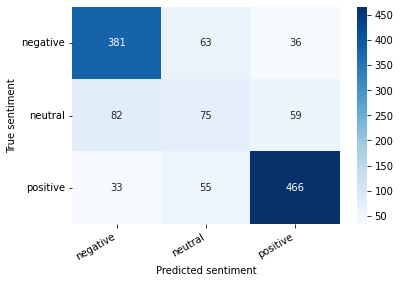

In [99]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=classnames, columns=classnames)
show_confusion_matrix(df_cm)

In [100]:
idx = 2

review_text = y_review_texts[idx]
true_sentiment = y_test[idx]
pred_df = pd.DataFrame({
  'class_names': classnames,
  'values': y_pred_probs[idx]
})

In [101]:
from textwrap import wrap
print("\n".join(wrap(review_text)))
print()
print(f'True sentiment: {classnames[true_sentiment]}')

Easy to use. No dramas. Very streamline for basic list use.

True sentiment: positive


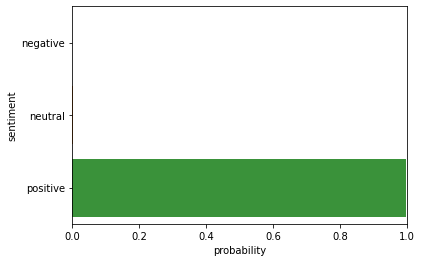

In [102]:
sns.barplot(x='values', y='class_names', data=pred_df, orient='h')
plt.ylabel('sentiment')
plt.xlabel('probability')
plt.xlim([0, 1]);

In [103]:
#predict one text
review_text = "I love completing my todos! Best app ever!!!"

In [106]:
encoded_review = tokenizer.encode_plus(
  review_text,
  max_length=max_length,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)

In [107]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Review text: {review_text}')
print(f'Sentiment  : {classnames[prediction]}')

Review text: I love completing my todos! Best app ever!!!
Sentiment  : positive
